# keras-bert prediction

<table class="tfo-notebook-buttons" align="left" >
 <td>
    <a target="_blank" href="https://colab.research.google.com/github/HighCWu/keras-bert-tpu/blob/master/demo/load_model/load_and_predict.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/HighCWu/keras-bert-tpu/blob/master/demo/load_model/load_and_predict.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [1]:
import os
os.chdir("E:/tp2/data")

In [2]:
import ktrain
from ktrain import text
import tensorflow as tf
import pandas as pd

C:\ProgramData\Anaconda3\envs\tp2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\tp2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\tp2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\tp2\lib\site-packages\tensorflow\python\framework

using Keras version: 2.2.4


In [3]:
os.chdir('valid')
df_valid = pd.read_csv('test_split01.csv',
                       names=['blog', 'class', "length"])
os.chdir('..')
df = pd.read_csv('train_posts.csv', 
                 names=['blog', 'class', 'length'])
#df['class'] = [int(c.split(',')[0]) for c in df['class']]
df.reset_index(drop=True)

,blog,class,length
0,"long time.. i have been busy with work, school...",0,NaN
1,what to talk about... well today was totaly bo...,0,NaN
2,just some stuff which animal is your sex symbo...,0,NaN
3,i gots a job now... yesterday i started workin...,0,NaN
4,"movie night! i really do hate fridays, because...",0,NaN
...,...,...,...
512624,whenever i hear my band warm down i love it. t...,1,NaN
512625,well since the last entry me and my girl talke...,1,NaN
512626,*sigh* well tonight me and my girl decided to ...,1,NaN
512627,if anyone is awake and acutally reading this p...,1,NaN


In [4]:
df_valid['class']

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: class, Length: 10000, dtype: int64

In [ ]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(df, val_df= df_valid,
                                                                text_column='blog',
                                                                label_columns=['class'],
                                                                maxlen=512, 
                                                                preprocess_mode='bert'
                                                                )

preprocessing train...
language: en


In [ ]:
model = text.text_classifier('bert', (x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model,train_data=(x_train, y_train), 
                             val_data=(x_test, y_test), batch_size=3)

In [7]:
# paste the 2 outputs arrays
# x_train[1].shape

In [8]:
#import numpy as np
#t = [np.argmax(y) for y in y_train]
#y = pd.DataFrame(t, columns=["target"])


In [9]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#fLDA = LinearDiscriminantAnalysis()
#principalComponents = fLDA.fit_transform(x_train[0], y.target)
#principalDf = pd.DataFrame(data=principalComponents, columns=['Principal component 1', 'Principal component 2'])
#finalDf_fLDA = pd.concat([principalDf, y], axis = 1)

In [10]:
"""
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component Fisher\'s LDA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf_fLDA['target'] == target
    ax.scatter(finalDf_fLDA.loc[indicesToKeep, 'Principal component 1']
               , finalDf_fLDA.loc[indicesToKeep, 'Principal component 2']
               , c = color
               , s = 20, alpha=0.3
              )
ax.legend(targets)
ax.grid()
"""


"\nfrom matplotlib import pyplot as plt\nfig = plt.figure(figsize = (6,6))\nax = fig.add_subplot(1,1,1) \nax.set_xlabel('Principal Component 1', fontsize = 15)\nax.set_ylabel('Principal Component 2', fontsize = 15)\nax.set_title('2 component Fisher's LDA', fontsize = 20)\ntargets = [0, 1, 2]\ncolors = ['r', 'g', 'b']\nfor target, color in zip(targets, colors):\n    indicesToKeep = finalDf_fLDA['target'] == target\n    ax.scatter(finalDf_fLDA.loc[indicesToKeep, 'Principal component 1']\n               , finalDf_fLDA.loc[indicesToKeep, 'Principal component 2']\n               , c = color\n               , s = 20, alpha=0.3\n              )\nax.legend(targets)\nax.grid()\n"

In [ ]:
learner.model.load_weights("blog-bert2.h5")

In [13]:
learner.fit(1e-5, 1)

Train on 512629 samples, validate on 10000 samples
Epoch 1/1
172536/512629 [=========>....................] - ETA: 17:29:10 - loss: 0.5202 - acc: 0.7790

KeyboardInterrupt: 

In [14]:
learner.model.save("blog-bert2.h5")

In [7]:
df_tests = os.listdir('valid')

In [9]:
sums = []
for file1 in df_tests:
    df_test = pd.read_csv('valid/'+file1, names=['blog', 'class'])
    predictor = ktrain.get_predictor(learner.model, preproc)
    predictor.c = [0, 1, 2]
    predictions = predictor.predict(df_test['blog'].tolist())
    print(sum([predictions[i] == x for i, x in enumerate(df_test['class'].tolist())]) / len(predictions))
    sums += [sum([predictions[i] == x for i, x in enumerate(df_test['class'].tolist())]) / len(predictions)]
    

0.736


0.7381


0.785


0.7519


0.7655


0.7401


0.7683


0.7406


0.7427


0.7058


0.7449


In [10]:
import numpy as np
np.mean(sums)

0.7471727272727272

In [11]:
def heatconmat(y_true, y_pred):
    sns.set_context('talk')
    plt.figure(figsize=(4,4))
    sns.heatmap(confusion_matrix(y_true,y_pred),
                annot=True,
                fmt='d',
                cbar=False,
                cmap='gist_earth_r',
                yticklabels=sorted(y_true.unique()))
    plt.show()
    print(classification_report(y_true,y_pred))



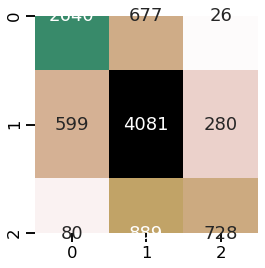

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      3343
           1       0.72      0.82      0.77      4960
           2       0.70      0.43      0.53      1697

    accuracy                           0.74     10000
   macro avg       0.74      0.68      0.70     10000
weighted avg       0.74      0.74      0.74     10000



In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
heatconmat(df_test['class'], predictions)

In [ ]:
df_test = pd.read_csv('test/test_mystere.csv', names=['blog', 'class'])
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.c = [0, 1, 2]
predictions = predictor.predict(df_test['blog'].tolist())

df_test["class"] = predictions

In [ ]:
df_test.to_csv('IFT6285-devoir1-test-simon-pelletier-antoine-st-laurent.csv')